## The atmosphere and its layers

The World Meteorological Organization (WMO) defines the atmosphere as:

*`A hypotetical vertical distribution of atmospheric temperature, pressure and density which by international agreement and for historical reasons, is roughly representative of year-round, midlatitude conditions.`*

In fact, the atmosphere is the mean that makes the link between the ground and space and it is crucial when studying perturbations since drag affects LEO satellites.

Therefore, it was necessary to develop some mathematical model based that could predict all the different conditions stated in WMO atmosphere definitoin for given altitudes.

Along history different models have been developed:

* ISA: up to 11 km.
* ISA-ICAO: up to 80 km.
* COESA 1962: up to 700 km.
* COESA 1976: up to 1000 km.
* Jacchia-Roberts

Since some of them are implemented in `poliastro`, let us compare the differences among them.

In [1]:
from poliastro.atmosphere.models import COESA62, COESA76
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt

### Comparing coesa62 and coesa76

Also known as `U.S. Standard Atmosphere`, the atmospheric model *coesa76* is just an update of his little brother *coesa62*. The difference is that geopotential heights diverge for higher altitudes.

Let us plot the `Temperature` as increasing altitude for both atmospheric models. 

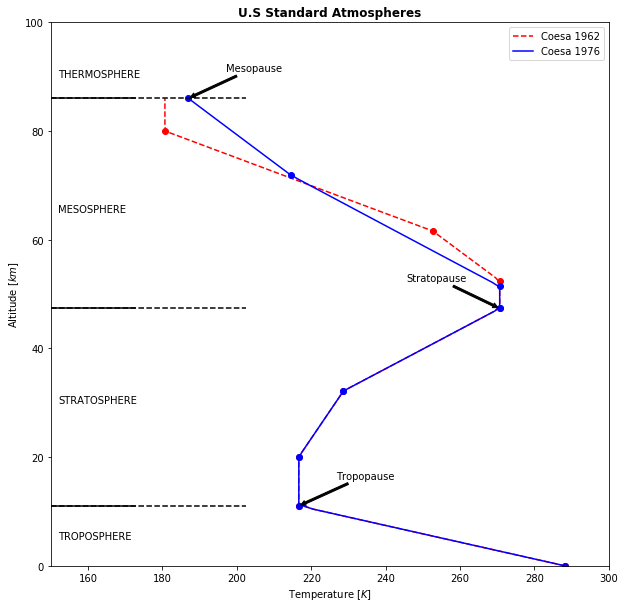

In [2]:
# We build the atmospheric instances
coesa62 = COESA62()
coesa76 = COESA76()

# Create the figure
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("U.S Standard Atmospheres", fontweight="bold")

# Collect all atmospheric models and define their plotting properties
atm_models = {coesa62: ["--r", "r", "Coesa 1962"], coesa76: ["-b", "b", "Coesa 1976"]}

# Solve atmospheric temperature for each of the models
for atm in atm_models:
    alt_span = np.linspace(0, 86, 100) * u.km
    T_span = np.array([])
    for alt in alt_span:
        # We solve for the temperature at given height
        T = atm.temperature(alt)
        T_span = np.append(T_span, T)
        
    # Temperature plot
    ax.plot(T_span, alt_span, atm_models[atm][0], label=atm_models[atm][-1])                                        
    ax.plot(atm._Tb_table[:8], atm._Zb_table[:8], atm_models[atm][1] + "o")
    ax.set_xlim(150, 300)
    ax.set_ylim(0, 100)                                                 
    ax.set_xlabel("Temperature $[K]$")                                  
    ax.set_ylabel("Altitude $[km]$") 
    ax.legend()
        
# Add some information on the plot
ax.annotate(
    "Tropopause",
    xy=(coesa76._Tb_table[1].value, coesa76._Zb_table[1].value),
    xytext=(coesa76._Tb_table[1].value + 10, coesa76._Zb_table[1].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black")
)
ax.annotate(
    "Stratopause",
    xy=(coesa76._Tb_table[4].value, coesa76._Zb_table[4].value),
    xytext=(coesa76._Tb_table[4].value - 25, coesa76._Zb_table[4].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black")
)
ax.annotate(
    "Mesopause",
    xy=(coesa76._Tb_table[7].value, coesa76._Zb_table[7].value),
    xytext=(coesa76._Tb_table[7].value + 10, coesa76._Zb_table[7].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black")
)

# Layers in the atmosphere
for h in [11.019, 47.350, 86]:
    ax.axhline(h, color='k', linestyle='--', xmin=0.0, xmax=0.35)
    ax.axhline(h, color='k', linestyle='-', xmin=0.0, xmax=0.15)
    
layer_names = {"TROPOSPHERE": 5, "STRATOSPHERE": 30, "MESOSPHERE": 65, "THERMOSPHERE": 90}
for name in layer_names:
    ax.annotate(
        name,
        xy=(152, layer_names[name]),
        xytext=(152, layer_names[name]),
    )

## Temperature, pressure and density distrubutions

One of the advantages of COESA76 is that it extends up to 1000 kilometers. The behaviour of previous magnitudes againts geometrical altitude can be checked in the following figure. **A logarithmic scale is applied for pressure and density to better see their decay for high altitude values.**

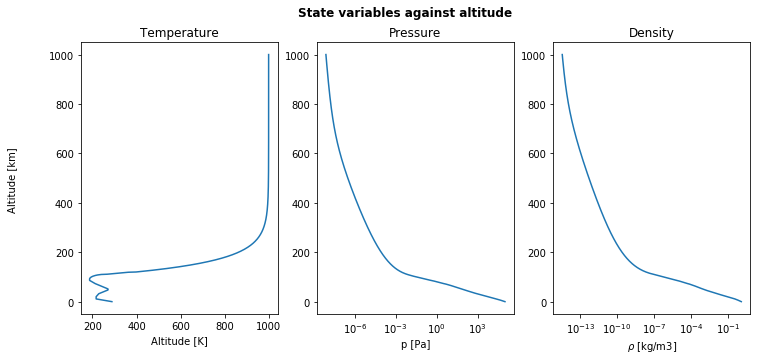

In [4]:
# We create the basis for the figure
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("State variables against altitude", fontweight="bold")
fig.text(0.04, 0.5, 'Altitude [km]', va='center', rotation='vertical')

# Complete altitude range and initialization of state variables sets
alt_span = np.linspace(0, 1000, 1001) * u.km
T_span = np.array([])
p_span = np.array([])
rho_span = np.array([])

# We solve for each property at given altitude
for alt in alt_span:
    T, p, rho = coesa76.properties(alt)
    T_span = np.append(T_span, T)
    p_span = np.append(p_span, p.to(u.Pa))
    rho_span = np.append(rho_span, rho)
    
# Temperature plot
axs[0].set_title("Temperature")
axs[0].set_xlabel("T [K]")
axs[0].set_xlabel("Altitude [K]")
axs[0].plot(T_span, alt_span)

# Pressure plot
axs[1].set_title("Pressure")
axs[1].set_xlabel("p [Pa]")
axs[1].plot(p_span, alt_span)
axs[1].set_xscale('log')

# Density plot
axs[2].set_title("Density")
axs[2].set_xlabel(r"$\rho$ [kg/m3]")
axs[2].plot(rho_span, alt_span)
axs[2].set_xscale('log')